In [173]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


xs = []
ys = []

with open("../cmake-build-debug/points.txt", 'r') as points_file:
    for line in points_file.readlines()[1:]:
        x, y = line.split(" ")
        y.replace("\n", "")
        
        xs.append(float(x))
        ys.append(float(y))

Using matplotlib backend: module://ipympl.backend_nbagg


In [178]:

minfreq = 1.0e36
maxfreq = 0.0

freqpath = "../cmake-build-debug/spectrum.txt"


freqs = []

with open(freqpath, 'r') as spectrum:
    dimension = int(spectrum.readline())
    for line in spectrum.readlines():
        freqs.append(float(line))
        minfreq = min(float(line), minfreq)
        maxfreq = max(float(line), maxfreq)

matrix = np.zeros((dimension, dimension))

for row in range(dimension):
    for col in range(dimension):
        frequency = freqs[row * dimension + col]
        # normalize
        frequency = (frequency - minfreq) / (maxfreq - minfreq)
        frequency = math.sqrt(frequency / maxfreq);
        matrix[row][col] = frequency


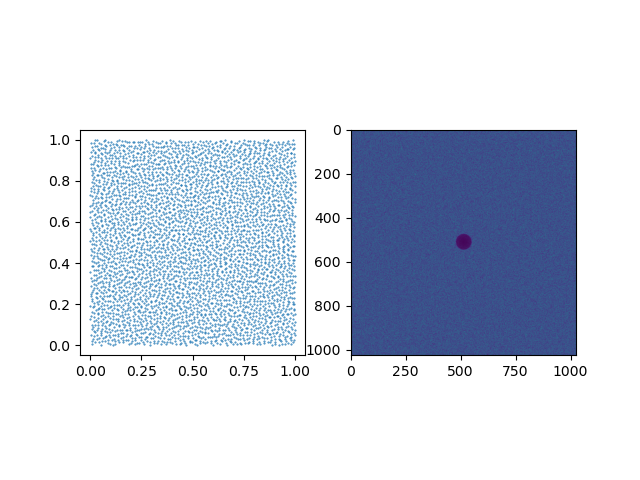

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(xs, ys, s=0.2)
ax1.set_aspect(1.0)
ax2.imshow(matrix)
plt.ion()
plt.show()

In [180]:
plt.close()